## Coding the linear regressions

__Task 1.__
Generates num_points random numbers from a uniform distribution.

In [646]:
import numpy as np
from numpy import linalg
import matplotlib.pyplot as plt

In [647]:
def generate_x_vec(xmin, xmax, num_points):
    # CODE HERE
    return np.matrix(np.random.uniform(low=xmin, high=xmax, size=num_points)).reshape(num_points,1)
    

In [648]:
generate_x_vec(1,10,2)

matrix([[4.44935022],
        [5.7465816 ]])

In [19]:
generate_x_vec(1,10,2) # sould be random number

matrix([[2.08325189],
        [5.18680118]])

__Task 2.__ Now write a function which will find the betas.

In [649]:
def linear_regression(X,Y):
    # CODE HERE
    # X -  nxm maatrix 
    # Y - nx1 matrix
    # beta  mx1 matrix
    beta = linalg.inv((X.transpose() * X)) * X.transpose() * Y

    return beta

In [650]:
def generate_points(x_vec, sigma, beta_star):
    y =  x_vec *beta_star
    y_star = np.random.normal(y, sigma)
    beta_hat = linear_regression(x_vec, y_star)
    return y,y_star, beta_hat

__Task 3.__ Now write a function plot_lines plots the red line, the green line and blue dots in one plot.

In [651]:
# CODE HERE

def plot_lines(beta_star, xmin, xmax, num_points, sigma):
 
    x_vec = generate_x_vec(xmin, xmax, num_points) 
    y,y_star,beta_hat = generate_points(x_vec,sigma,beta_star)
        
    x_vec = np.asarray(x_vec)
    y_star = np.asarray(y_star)
        
    y_hat = x_vec.dot(beta_hat)
        
    # blue dots actual dots.
    plt.scatter(x_vec,y_star,color='b')
    # Red line the fitted line.
    plt.plot(x_vec,y_hat,color='r')
    
    # Green line the actual line
    plt.plot(x_vec,y,color='g')
    plt.grid()

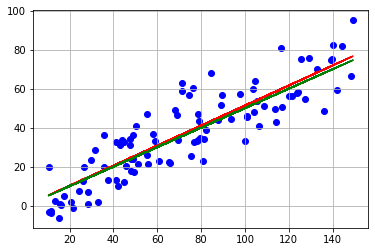

In [652]:
plot_lines(0.5, 10., 150., 100, 10)

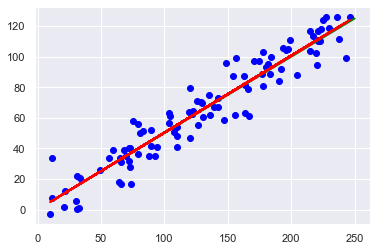

__Task 4.__ Now write a function **plot_lines** that generates the blue dots many times and plots all the red lines in one plot.

In [654]:
# CODE HERE

def plot_lines(beta_star, num_trials, xmin, xmax, num_points, sigma):
 
    for i in range(num_trials):
        x_vec = generate_x_vec(xmin, xmax, num_points) 
        y,y_star,beta_hat = generate_points(x_vec,sigma,beta_star)
        
        x_vec = np.asarray(x_vec)
        y_star = np.asarray(y_star)
        
        y_hat = x_vec.dot(beta_hat)
        
        # blue dots actual dots.
        plt.scatter(x_vec,y_star,color='b')
        # Red line the fitted line.
        plt.plot(x_vec,y_hat,color='r')
    
    # Green line the actual line
    plt.plot(x_vec,y,color='g',linewidth=5)
    plt.grid() 

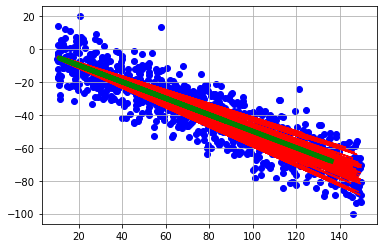

In [655]:
plot_lines(-0.5, 100, 10., 150., 10, 10)

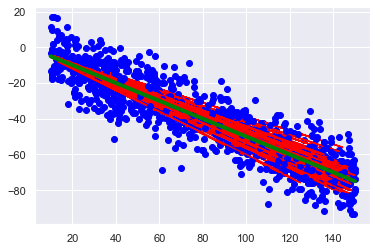

In [31]:
plot_lines(-0.5, 100, 10., 150., 10, 10)

__Part 5.__ your x vector is a 1D vector but for polynomial you need to create a matrix XX that contains many degrees of the inputs x. For this we will write a function transform_x that will take a vector x** and return a matrix **X for the d-degree polynomial regression.

In [656]:
def transform_x(x,d):
    # d the degrees of polinomials.
    X = []
    for i in range(0,d+1):
        X.append(x**i)
        
    X = np.matrix(X).T
    return X


In [657]:
def linear_regression(X,Y):
    # CODE HERE
    beta = linalg.inv((X.transpose() * X))*X.transpose()*Y
    return beta

In [658]:
def generate_x_vec(xmin, xmax, num_points):
     # CODE HERE
    return np.random.uniform(low=xmin, high=xmax, size=num_points)  


__Part 6.__ Write function generate_points_polynomial which will generate the y_star values for the points we have in x_vec. y_star will be generating using the green line, that is, beta_star.
Hint: if you construct the right matrix X** then **y_star1 will be X.dot(beta_star) ... well almost, remember that y_star should have some randomness - so y_star = np.random.normal(y_star1, sigma) - this will add some randomness.

Now you have your blue dots and it is time to perform regression on them. Make sure you give the correct X to the linear regression function and you will receive your beta_hat.

The difference from the simple case is that you have two more function variables - d_star and d_train. d_star is the degree of the polynomial that represents the real function - the green line. d_train on the other hand, the degree of the polynomials we are using for our regression. Think about the relationship of d_star, beta_star, d_train, and beta_hat.

In [659]:
def generate_points_polynomial(x_vec, sigma, d_star, beta_star):
    y_star = []
    x_matrix = transform_x(x_vec, d_star)
    for row in x_matrix:
        y_star.append(np.random.normal(row.dot(beta_star), sigma))
        
    y_star = np.matrix(np.array(y_star).reshape(len(y_star),1))
    
    return y_star

def train(x_vec, y_star, d_train):
    x_matrix = transform_x(x_vec, d_train)
    beta_hat = linear_regression(x_matrix, y_star)
    return beta_hat

__Part 7.__ write **plot_lines_polynomial** that will do the work to generate the points and plot the lines.

In [662]:
def plot_lines_polynomial(beta_star, d_star, d_train, num_trials, xmin, xmax, num_points, sigma):
    x_vec_plot = np.arange(xmin, xmax, (xmax - xmin)/100)

    x_matrix_star = transform_x(x_vec_plot, d_star)
    x_matrix_hat = transform_x(x_vec_plot, d_train)
    
    y_star = x_matrix_star.dot(beta_star)
    x_vec_plot = np.matrix(x_vec_plot.reshape(len(x_vec_plot),1))
    y_star = np.matrix(y_star.reshape(100,1))
    plt.plot(x_vec_plot, y_star, linewidth=2, color="green")
    
    x_vec = generate_x_vec(xmin, xmax, num_points)
    
    for i in range(num_trials):
        y_star = generate_points_polynomial(x_vec, sigma, d_star, beta_star)
        
        x_vec = np.asarray(x_vec)
        y_star = np.asarray(y_star)
        
        beta_hat = train(x_vec, y_star, d_train)
        if i == 0:
            plt.scatter(x_vec, y_star)
        y_hat_plot = x_matrix_hat.dot(beta_hat)
        plt.plot(x_vec_plot, y_hat_plot, linewidth=2, color="red")
    if d_train == 9 and num_points == 30:
         plt.axis([xmin, xmax, -500, 2500])
    else:
        plt.axis([xmin, xmax, xmin, xmax])
    plt.show()

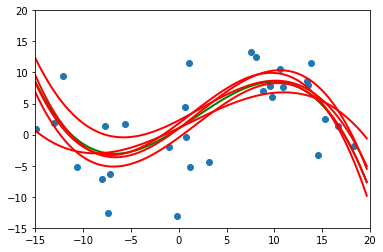

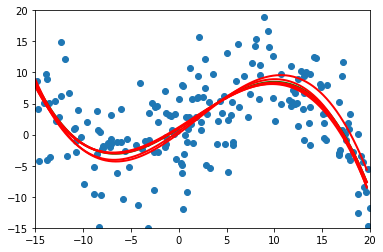

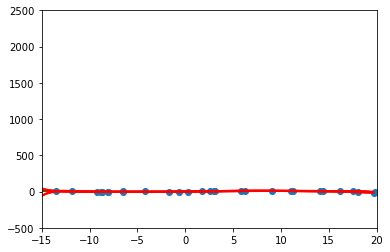

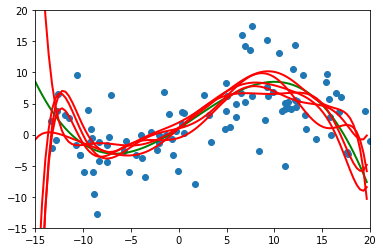

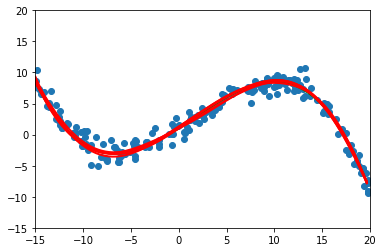

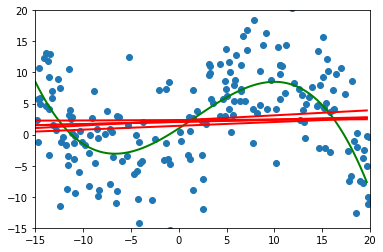

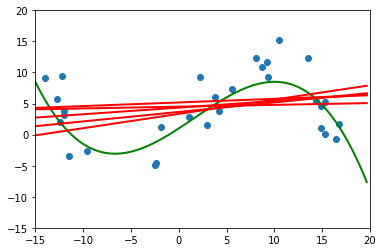

In [663]:
num_trials = 5
beta_star = [1, 1, 0.025, -0.005]
d_star = 3
d_train = 3
d_train2 = 9
d_train3 = 1
plot_lines_polynomial(beta_star, d_star, d_train, num_trials, -15, 20,30, 5)
plot_lines_polynomial(beta_star, d_star, d_train, num_trials, -15, 20,200, 5)
plot_lines_polynomial(beta_star, d_star, d_train2, num_trials, -15, 20,30, 5)
plot_lines_polynomial(beta_star, d_star, d_train2, num_trials, -15, 20,100, 5)
plot_lines_polynomial(beta_star, d_star, d_train2, num_trials, -15, 20,200, 1)
plot_lines_polynomial(beta_star, d_star, d_train3, num_trials, -15, 20,200, 5)
plot_lines_polynomial(beta_star, d_star, d_train3, num_trials, -15, 20,30, 5)
